# Wczytanie danych i wstępna analiza

In [ ]:
import pandas as pd

In [ ]:
employee = pd.read_csv('/content/HR Employee Attrition.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
employee['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068])

In [ ]:
employee['EmployeeCount'].unique()

array([1])

In [ ]:
employee['Over18'].unique()

array(['Y'], dtype=object)

In [ ]:
employee.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Na podstawie podtswie powyższych danych stwierdzamy, że

In [ ]:
employee.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Tworzenie wykresów

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
employee['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

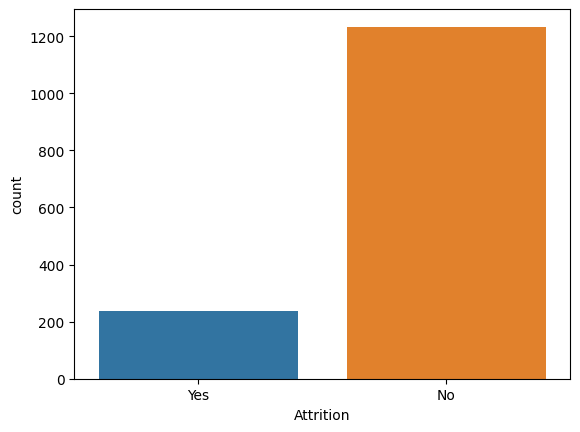

In [ ]:
sns.countplot(x=employee['Attrition'])

Dane są niezbilansowane. Widzimy, że na etapie modelowania będziemy musiały zbalansować te dane.

In [ ]:
employee['Age_new']=pd.cut(employee['Age'],
                          bins=[18, 25, 35, 45, 55, 60],
                          labels=['18-25', '26-35', '36-45', '46-55', '56-60'])

<Axes: xlabel='Age_new', ylabel='MonthlyIncome'>

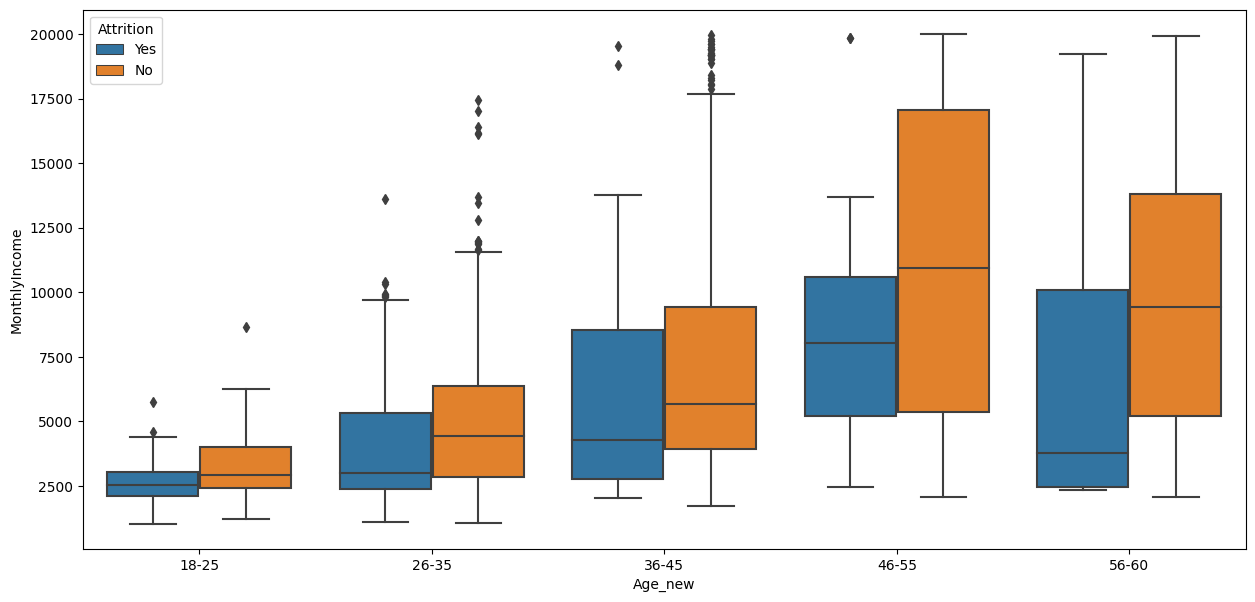

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Age_new", y="MonthlyIncome", data=employee,hue='Attrition')

Wraz z wiekiem zarobki się zwiększają. Widzimy, że dla osób, które zdecydowały się pozostać w fimie widzimy, że ich zarobki są wyższe.

In [ ]:
employee['YearsAtCompany_new']=pd.cut(employee['YearsAtCompany'],
                          bins=[0, 5, 10, 15, 20, 25, 30, 35, 40],
                          labels=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40'])

<Axes: xlabel='YearsAtCompany_new', ylabel='MonthlyIncome'>

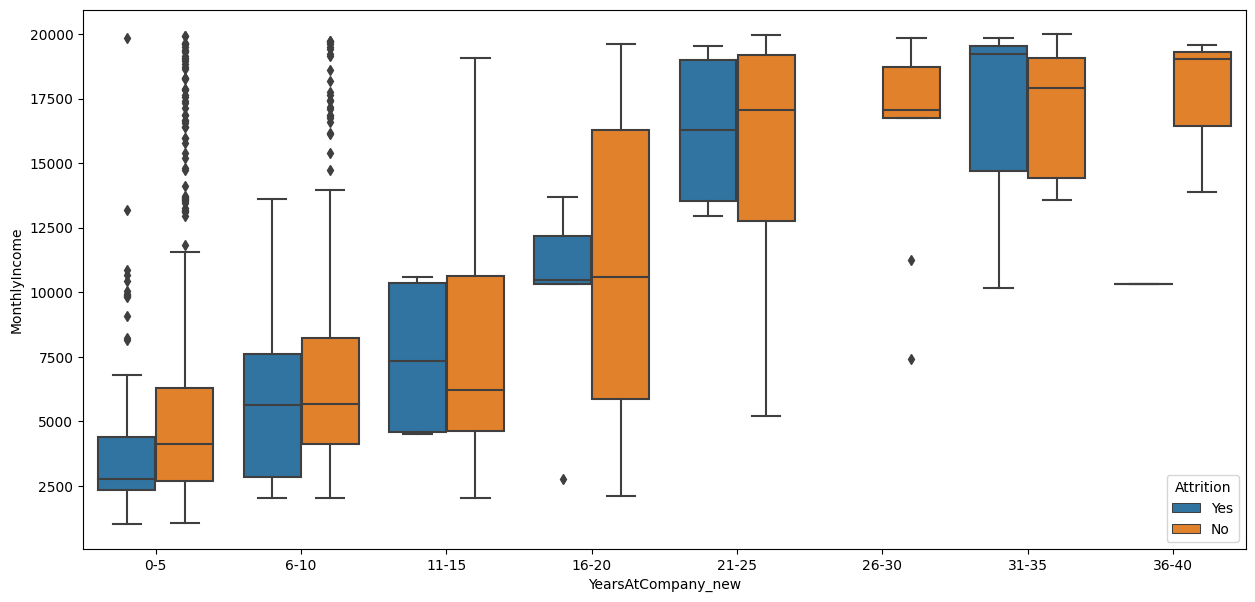

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x="YearsAtCompany_new", y="MonthlyIncome", data=employee,hue='Attrition')

Wraz ze wzrostem przepracowanych lat większają się zarobki i zmiejsza się ilość osób, które odchodzą. Wyjątkiem jest przedział 31-35

<Axes: xlabel='Department', ylabel='MonthlyIncome'>

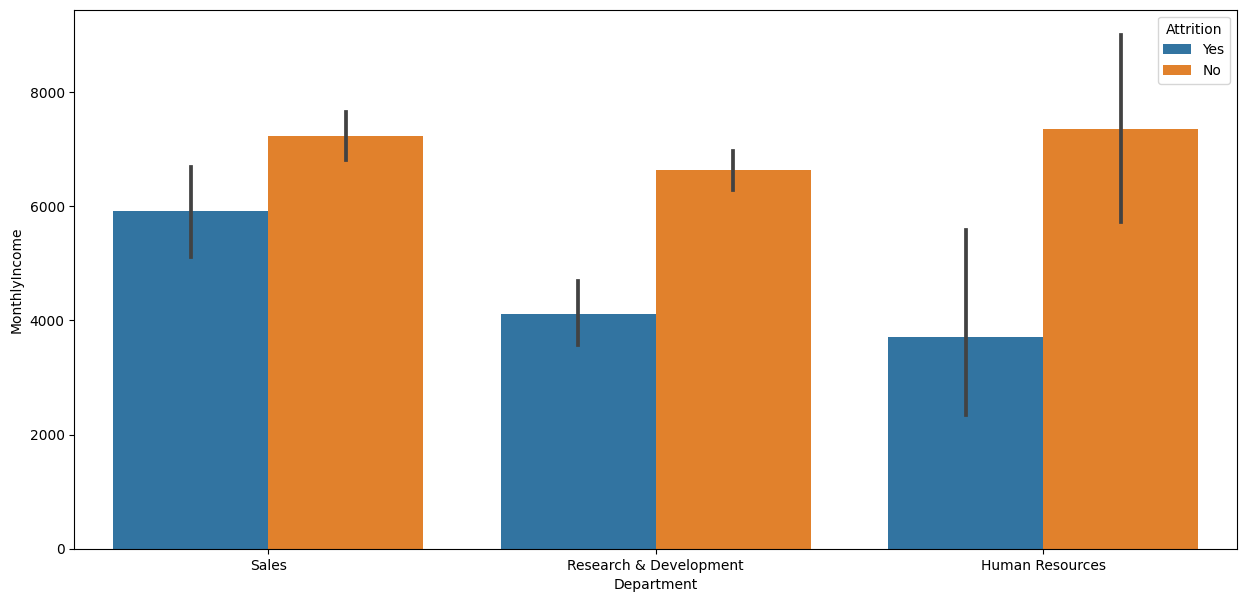

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="Department", y="MonthlyIncome", data=employee,hue='Attrition')

Zarobki są najwyższe dla pracowników z działu HR, którzy zdecydowali się pozostać w firmie.

# Przygotowanie danych pod testy

## Zamiana danych kategorycznych na numeryczne

In [ ]:
employee['Attrition'] = employee['Attrition'].astype('category').cat.codes

In [ ]:
employee['BusinessTravel'] = employee['BusinessTravel'].astype('category').cat.codes

In [ ]:
employee['Department'] = employee['Department'].astype('category').cat.codes

In [ ]:
employee['EducationField'] = employee['EducationField'].astype('category').cat.codes

In [ ]:
employee['Gender'] = employee['Gender'].astype('category').cat.codes

In [ ]:
employee['JobRole'] = employee['JobRole'].astype('category').cat.codes

In [ ]:
employee['MaritalStatus'] = employee['MaritalStatus'].astype('category').cat.codes

In [ ]:
employee['OverTime'] = employee['OverTime'].astype('category').cat.codes

In [ ]:
employee.drop(['Age_new', 'YearsAtCompany_new'], axis=1, inplace=True)

## Dyskretyzacja danych

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
disc = KBinsDiscretizer(n_bins=10,
                        encode='ordinal',
                        strategy='quantile')

In [ ]:
X_disc = disc.fit_transform(employee[['DailyRate', 'MonthlyIncome', 'MonthlyRate']])

In [ ]:
employee2 = employee.copy() # kopiujemy oryginalny zbiór X
employee2[['DailyRate', 'MonthlyIncome', 'MonthlyRate']] = X_disc

In [ ]:
employee2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,7.0,2,1,2,1,2,0,94,3,2,7,4,2,6.0,7.0,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,1.0,1,8,1,1,3,1,61,2,2,6,2,1,5.0,9.0,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,9.0,1,2,2,4,4,1,92,2,1,2,3,2,0.0,0.0,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,9.0,1,3,4,1,4,0,56,3,1,6,3,1,2.0,8.0,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,3.0,1,2,1,3,1,1,40,3,1,2,2,1,3.0,5.0,9,0,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
correlation_matrix = employee2.corr()

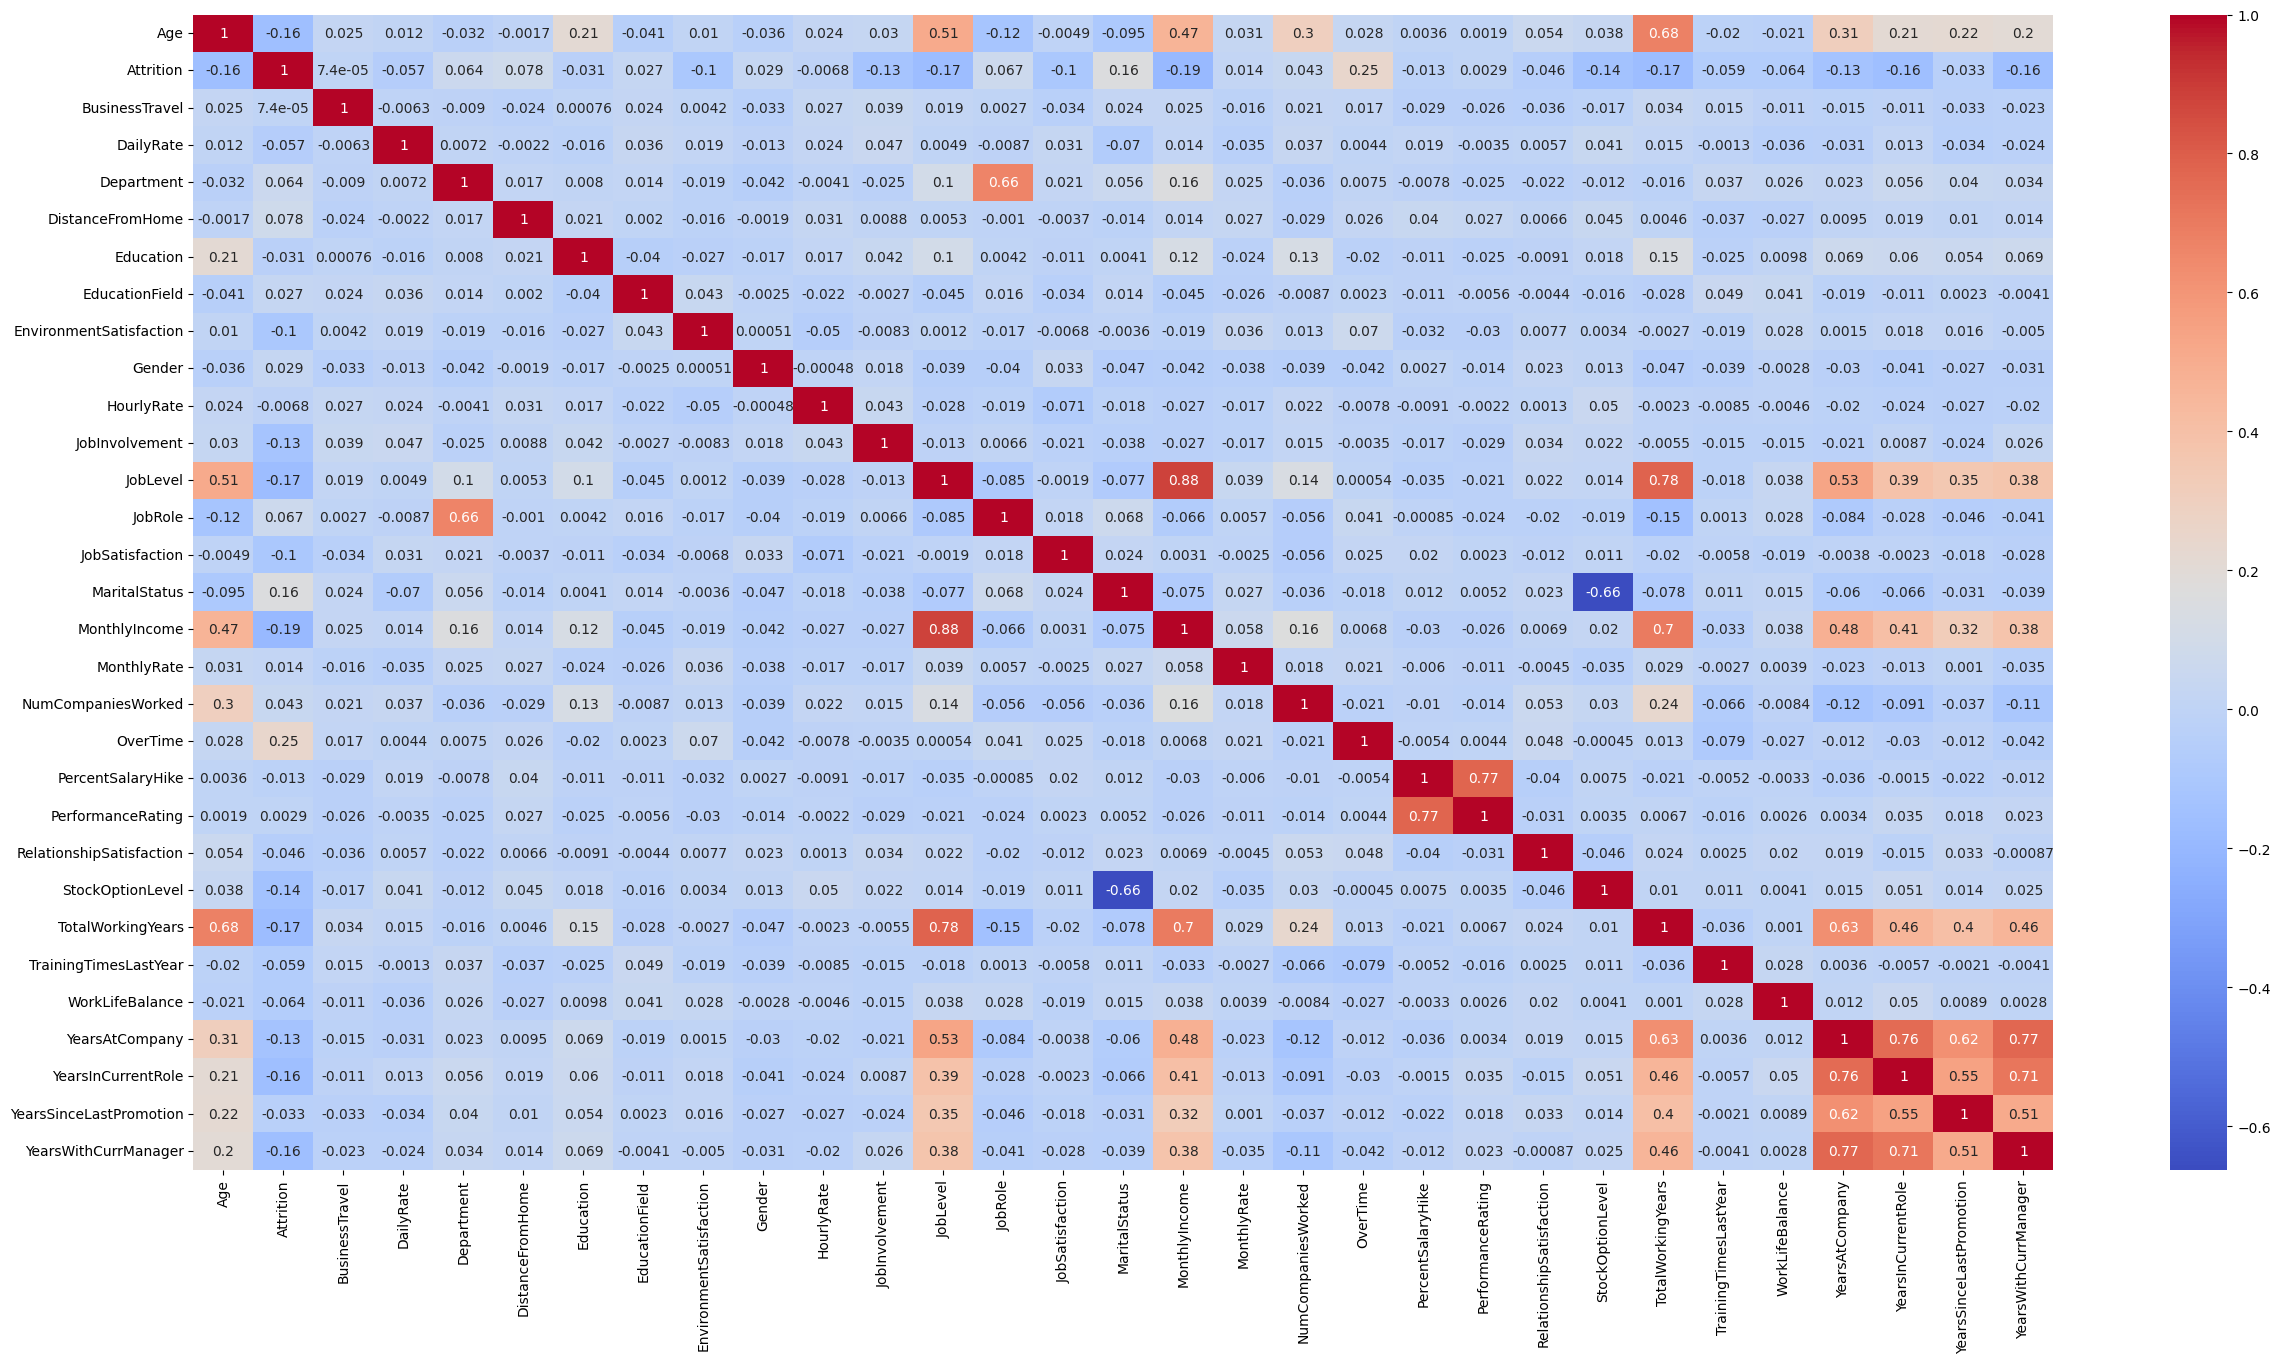

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
plt.show()

In [ ]:
employee2.describe()

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,4.501361,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,2.729932,2.063946,4.458503,2.728571,1.097279,4.500000,4.500000,2.693197,0.282993,15.209524,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,2.874206,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,0.711561,1.106940,2.461821,1.102846,0.730121,2.873259,2.873259,2.498009,0.450606,3.659938,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,5.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4.500000,4.500000,2.000000,0.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,7.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,3.000000,3.000000,7.000000,4.000000,2.000000,7.000000,7.000000,4.000000,1.000000,18.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,9.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,4.000000,5.000000,8.000000,4.000000,2.000000,9.000000,9.000000,9.000000,1.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# employee2.drop(['BusinessTravel', 'HourlyRate', 'PerformanceRating'], axis=1, inplace=True)

In [ ]:
# q = employee2["YearsAtCompany"].quantile(0.99)

In [ ]:
# employee2[employee2["YearsAtCompany"] < q]

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,7.0,2,1,2,1,2,0,3,2,7,4,2,6.0,7.0,8,1,11,1,0,8,0,1,6,4,0,5
1,49,1.0,1,8,1,1,3,1,2,2,6,2,1,5.0,9.0,1,0,23,4,1,10,3,3,10,7,1,7
2,37,9.0,1,2,2,4,4,1,2,1,2,3,2,0.0,0.0,6,1,15,2,0,7,3,3,0,0,0,0
3,33,9.0,1,3,4,1,4,0,3,1,6,3,1,2.0,8.0,1,1,11,3,0,8,3,3,8,7,3,0
4,27,3.0,1,2,1,3,1,1,3,1,2,2,1,3.0,5.0,9,0,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,5.0,1,23,2,3,3,1,4,2,2,4,1,1.0,4.0,4,0,17,3,1,17,3,3,5,2,0,3
1466,39,3.0,1,6,1,3,4,1,2,3,0,1,1,8.0,7.0,4,0,15,1,1,9,5,3,7,7,1,7
1467,27,0.0,1,4,3,1,2,1,4,2,4,2,1,6.0,1.0,1,1,20,2,1,6,0,3,6,2,0,3
1468,49,6.0,2,2,3,3,4,1,2,2,7,2,1,5.0,4.0,2,0,14,4,0,17,3,2,9,6,0,8


In [ ]:
# q_low = employee2["YearsAtCompany"].quantile(0.01)
# q_hi  = employee2["YearsAtCompany"].quantile(0.99)

# df_filtered = employee2[(employee2["YearsAtCompany"] < q_hi) & (employee2["YearsAtCompany"] > q_low)]

In [ ]:
# df_filtered.describe()

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1410.00000,1410.000000,1410.000000,1410.00000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000
mean,36.91773,4.523404,1.257447,9.22695,2.907092,2.246099,2.717730,0.595745,2.735461,2.054610,4.454610,2.733333,1.083688,4.509929,4.493617,2.704255,0.280142,15.215603,2.704255,0.801418,11.185816,2.785106,2.758865,6.925532,4.304965,2.195035,4.195745
std,8.90365,2.867518,0.527153,8.11527,1.016133,1.338305,1.093129,0.490921,0.712021,1.086988,2.464164,1.101561,0.727696,2.839242,2.856696,2.514073,0.449228,3.671815,1.084007,0.850999,7.420232,1.285362,0.706863,5.433068,3.563364,3.152991,3.510703
min,19.00000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30.00000,2.000000,1.000000,2.00000,2.000000,1.000000,2.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.00000,5.000000,1.000000,7.00000,3.000000,2.000000,3.000000,1.000000,3.000000,2.000000,5.000000,3.000000,1.000000,5.000000,4.000000,2.000000,0.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.00000,7.000000,2.000000,14.00000,4.000000,3.000000,4.000000,1.000000,3.000000,3.000000,7.000000,4.000000,2.000000,7.000000,7.000000,4.000000,1.000000,18.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.00000,9.000000,2.000000,29.00000,5.000000,5.000000,4.000000,1.000000,4.000000,5.000000,8.000000,4.000000,2.000000,9.000000,9.000000,9.000000,1.000000,25.000000,4.000000,3.000000,37.000000,6.000000,4.000000,30.000000,18.000000,15.000000,17.000000


# Modele predykcyjne

In [ ]:
y = employee2.pop('Attrition')

In [ ]:
X = employee2

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2)

## Bilansowanie modelu

### Bez bilansowania

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=900)
model.fit(X_train, y_train)

LogisticRegression(max_iter=900)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       241
           1       0.63      0.32      0.42        53

    accuracy                           0.84       294
   macro avg       0.75      0.64      0.67       294
weighted avg       0.82      0.84      0.82       294



In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       992
           1       0.74      0.41      0.53       184

    accuracy                           0.89      1176
   macro avg       0.82      0.69      0.73      1176
weighted avg       0.87      0.89      0.87      1176



### Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
over = RandomOverSampler(random_state=123)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

In [ ]:
model_over = LogisticRegression(max_iter=900)
model_over.fit(X_train_over, y_train_over)

LogisticRegression(max_iter=900)

In [ ]:
y_pred_over = model_over.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       241
           1       0.42      0.66      0.51        53

    accuracy                           0.77       294
   macro avg       0.67      0.73      0.68       294
weighted avg       0.82      0.77      0.79       294



### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
model_smote = LogisticRegression(max_iter=900)
model_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=900)

In [ ]:
y_pred_smote = model_smote.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       241
           1       0.39      0.49      0.43        53

    accuracy                           0.77       294
   macro avg       0.63      0.66      0.64       294
weighted avg       0.79      0.77      0.78       294



### Ważenie klas

In [ ]:
model_weight = LogisticRegression(max_iter=900, class_weight = 'balanced')
model_weight.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=900)

In [ ]:
y_pred_weight = model_weight.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_weight))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       241
           1       0.37      0.62      0.46        53

    accuracy                           0.74       294
   macro avg       0.64      0.70      0.65       294
weighted avg       0.81      0.74      0.76       294



Zdecydowałyśmy się użyć oversampling

## Wybieramy odpowedni model

### SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train_over, y_train_over)

SVC(kernel='linear')

In [ ]:
y_pred_svm = svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       241
           1       0.42      0.66      0.51        53

    accuracy                           0.77       294
   macro avg       0.67      0.73      0.68       294
weighted avg       0.82      0.77      0.79       294



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train_over, y_train_over)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77       241
           1       0.27      0.51      0.35        53

    accuracy                           0.66       294
   macro avg       0.57      0.60      0.56       294
weighted avg       0.76      0.66      0.70       294



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       241
           1       0.31      0.30      0.30        53

    accuracy                           0.75       294
   macro avg       0.58      0.58      0.58       294
weighted avg       0.75      0.75      0.75       294



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=50)
adaboost.fit(X_train_over, y_train_over)

AdaBoostClassifier()

In [ ]:
y_pred_train = adaboost.predict(X_train)
y_pred = adaboost.predict(X_test)

In [ ]:
model = LogisticRegression(max_iter=900)
model.fit(X_train, y_train)

LogisticRegression(max_iter=900)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       241
           1       0.63      0.32      0.42        53

    accuracy                           0.84       294
   macro avg       0.75      0.64      0.67       294
weighted avg       0.82      0.84      0.82       294



In [ ]:
from sklearn.metrics import confusion_matrix

<Axes: >

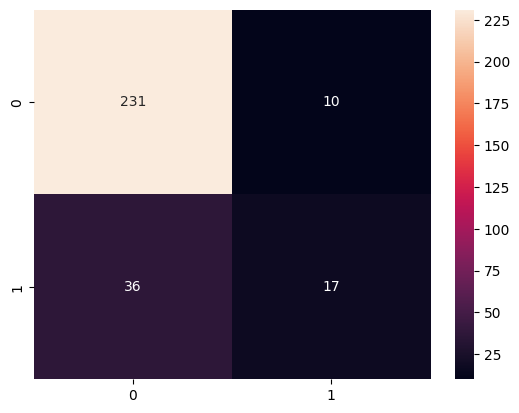

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score

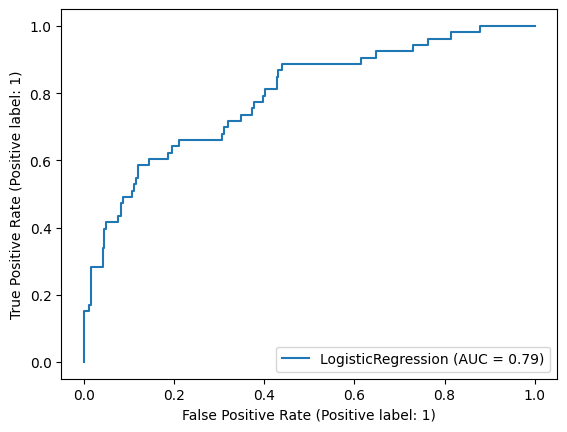

In [ ]:
RocCurveDisplay.from_estimator(model, X_test, y_test)